In [48]:
import pandas as pd
import json

In [121]:
df_b = pd.read_json('yelp_academic_dataset_business.json', lines=True)
drop_columns = ['postal_code','address','name']
df_b = df_b.drop(drop_columns, axis=1)

In [122]:
import numpy as np
df_b=df_b.replace(to_replace='None', value=np.nan)
df_b=df_b[~df_b['categories'].isnull()]
df_b=df_b[df_b['categories'].str.contains('Restaurants')]
df_b.head(5)

,business_id,city,state,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Boulder,CO,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Portland,OR,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Vancouver,BC,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
7,jFYIsSb7r1QeESVUnXPHBw,Columbus,OH,39.947007,-82.997471,4.5,11,1,None,"Breakfast & Brunch, Restaurants","{'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}"
12,HPA_qyMEddpAEtFof02ixg,Peabody,MA,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [123]:
df_b.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)
df_activities=df_b[df_b.categories.str.contains("Restaurants", na=False)==True]

In [124]:
df_activities = df_activities[df_activities.is_open==1]

In [125]:
df_activities['city']=df_activities['city'].str.lower()

In [126]:
df_activities.groupby(by=['city','state']).mean('stars').drop(columns=['latitude', 'longitude', 'is_open', 'review_count']).sort_values(by = 'stars', ascending=False)

,,stars
city,state,
gotha,FL,5.0
northeast orlando,FL,5.0
union park,FL,5.0
st johns,OR,5.0
loughman,FL,4.5
...,...,...
sheridan,WY,1.5
e.point,GA,1.5
clarkson,GA,1.5


In [128]:
df_rev = df_activities.groupby(by=['city','state']).sum().drop(columns= ['latitude', 'longitude', 'stars',
                                                                         'is_open'])

In [129]:
df_rev

,,review_count
city,state,
alafaya,FL,135
alamonte springs,FL,117
allston,MA,17932
aloha,OR,2751
aloma,FL,19
...,...,...
winter springs,FL,3895
winterpark,FL,7
winthrop,MA,2748


In [130]:
df_rev.mean()

review_count    11049.63587
dtype: float64

In [131]:
print('the maximum is: ', df_rev.max())

the maximum is:  review_count    584558
dtype: int64


In [132]:
print('the minimum is:', df_rev.min())

the minimum is: review_count    5
dtype: int64


In [133]:
print('the median is: ', df_rev.median())

the median is:  review_count    766.5
dtype: float64


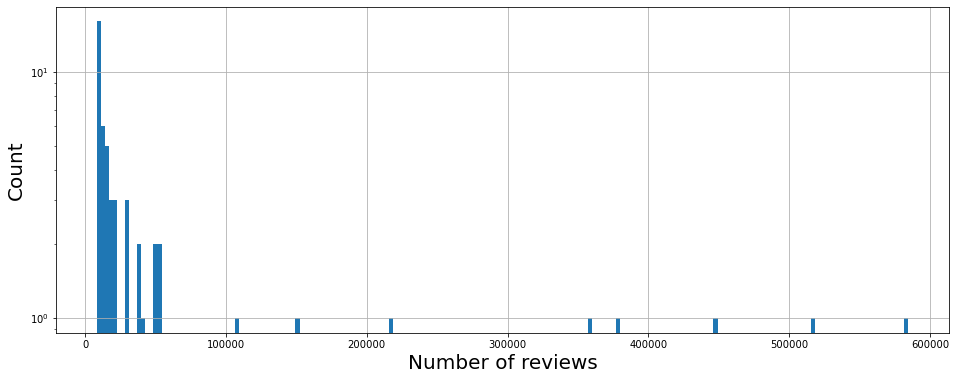

In [198]:
fig,ax=plt.subplots(1,1,figsize=(16,6))
df_rev.hist(bins=200, log=True,ax=ax)
plt.xlabel('Number of reviews',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('')
plt.show()

In [174]:
df_rev = df_rev[df_rev['review_count']>8000]
list_cities = df_rev.index.tolist()

In [182]:
df_rev.sort_values(by='review_count')

,,review_count
city,state,
marietta,GA,8201
clermont,FL,8299
hillsboro,OR,8522
oviedo,FL,8630
louisville,CO,8711
westerville,OH,8768
braintree,MA,8778
dorchester,MA,9189
malden,MA,9273


In [183]:
num=[]
for i in range(len(df_rev)):
    for j in range(len(list_cities)):
        if df_activities[['city','state']].values[i][0]==list_cities[j][0] and df_activities[['city','state']].values[i][1]==list_cities[j][1]:
            num.append(i)
            break

In [185]:
df_activities=df_activities.iloc[num]

In [107]:
df_activities[['city','state']].values

array([['boulder', 'CO'],
       ['portland', 'OR'],
       ['vancouver', 'BC'],
       ...,
       ['orlando', 'FL'],
       ['bee cave', 'TX'],
       ['atlanta', 'GA']], dtype=object)

In [186]:
df_to_visualize = df_activities.groupby(by=['city','state']).mean('stars').sort_values('stars', ascending=False).drop(columns= ['latitude', 'longitude', 'is_open', 'review_count'])[0:10]
df_to_visualize

,,stars
city,state,
quincy,MA,4.000000
burnaby,BC,4.000000
portland,OR,3.833333
kissimmee,FL,3.500000
clermont,FL,3.500000
somerville,MA,3.500000
newton,MA,3.500000
vancouver,WA,3.500000
cambridge,MA,3.500000


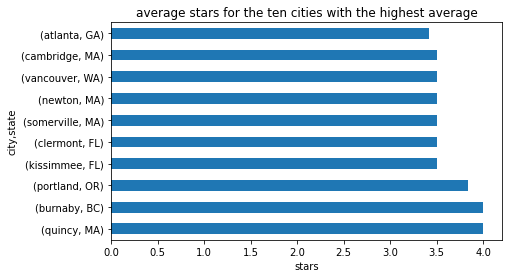

In [187]:
plt.rcParams["figure.figsize"] = (7,4)
ax = df_to_visualize.plot(kind = 'barh')
ax.get_legend().remove()
plt.title('average stars for the ten cities with the highest average')
plt.xlabel('stars')
plt.show()

In [188]:
lat = df_activities['latitude'].values
lon = df_activities['longitude'].values
population = df_activities['stars']

<function matplotlib.pyplot.show(close=None, block=None)>

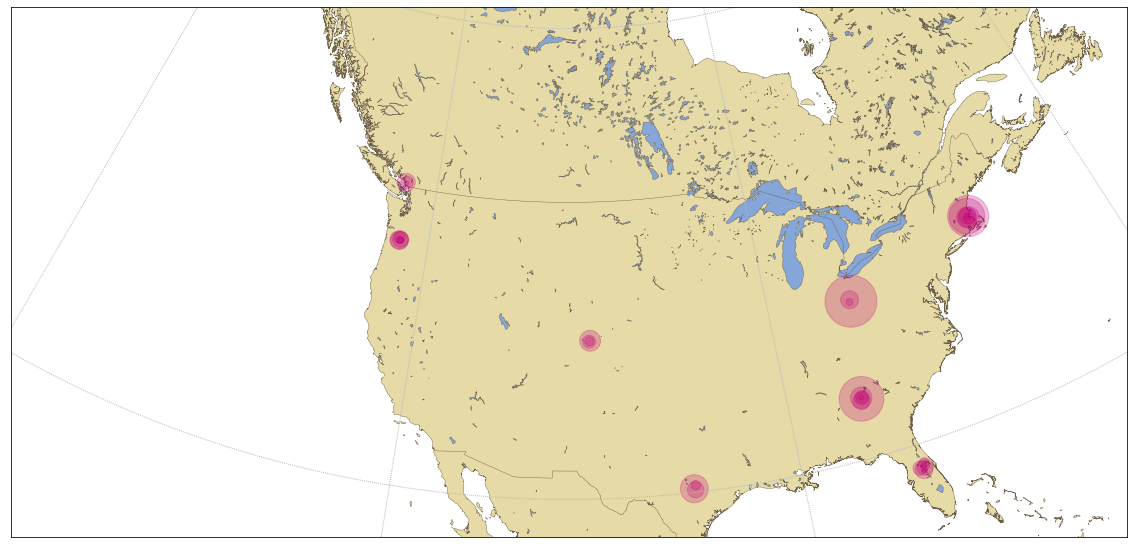

In [194]:
import matplotlib.cm as cm
fig = plt.figure(figsize=(20, 10))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=44.5, lon_0=-107,
            width=8.0E6, height=3.8E6)

# draw coastlines, country boundaries, fill continents.
m.fillcontinents(color='xkcd:beige',lake_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawcountries(color='#6D5F47', linewidth=.4)

# draw lat/lng grid lines every 30 degrees.
m.drawmeridians(np.arange(-180, 180, 30), color='#bbbbbb')
m.drawparallels(np.arange(-90, 90, 30), color='#bbbbbb')

#scatter scaled circles at the city locations
m.scatter(
    lon,
    lat,
    latlon=True,
    s=population*2, #size
    c='xkcd:magenta', #color
    marker='o', #symbol
    alpha=0.25, #transparency
    zorder = 2, #plotting order
    )

#m.scatter( lon , lat, s=pop/15, alpha=0.5,latlon=True,cmap='viridis')
plt.show

In [54]:
max(df_b.review_count)

9185

In [55]:
tot=df_b.review_count.sum()
tot

5395116

In [56]:
remove=['is_open','attributes','categories','hours']
df_b=df_b.drop(remove,axis=1)
df_b.head(3)

,business_id,city,state,latitude,longitude,stars,review_count
0,6iYb2HFDywm3zjuRg0shjw,Boulder,CO,40.017544,-105.283348,4.0,86
1,tCbdrRPZA0oiIYSmHG3J0w,Portland,OR,45.588906,-122.593331,4.0,126
5,D4JtQNTI4X3KcbzacDJsMw,Vancouver,BC,49.251342,-123.101333,3.5,169


In [57]:
df_b['city']=df_b['city'].str.lower()

In [58]:
df_b.head(3)

,business_id,city,state,latitude,longitude,stars,review_count
0,6iYb2HFDywm3zjuRg0shjw,boulder,CO,40.017544,-105.283348,4.0,86
1,tCbdrRPZA0oiIYSmHG3J0w,portland,OR,45.588906,-122.593331,4.0,126
5,D4JtQNTI4X3KcbzacDJsMw,vancouver,BC,49.251342,-123.101333,3.5,169


In [59]:
len(df_b.groupby(by=['city','state'],as_index=True).count())

429

In [60]:
df_b.groupby(by=['city','state'],as_index=True).mean().sort_values(by='stars')

,,latitude,longitude,stars,review_count
city,state,,,,
miami beach,FL,28.552629,-81.473134,1.0,16.0
candler-mcafee,GA,33.732842,-84.282724,1.5,7.0
sheridan,WY,40.022457,-105.260884,1.5,9.0
clarkson,GA,33.823199,-84.232796,1.5,7.0
southeast orlando,FL,28.434536,-81.314024,1.5,49.0
...,...,...,...,...,...
brookwood,GA,33.799445,-84.392477,5.0,6.0
st johns,OR,45.587852,-122.742246,5.0,97.0
wekiva springs,FL,28.706449,-81.445387,5.0,38.0


In [10]:
df_b.state.unique()

array(['CO', 'OR', 'BC', 'OH', 'MA', 'FL', 'TX', 'GA', 'WA', 'KS', 'MN',
       'VA', 'WY', 'KY', 'NH', 'ABE'], dtype=object)

In [46]:
df_b

,business_id,city,state,latitude,longitude,stars,review_count
0,6iYb2HFDywm3zjuRg0shjw,boulder,CO,40.017544,-105.283348,4.0,86
1,tCbdrRPZA0oiIYSmHG3J0w,portland,OR,45.588906,-122.593331,4.0,126
5,D4JtQNTI4X3KcbzacDJsMw,vancouver,BC,49.251342,-123.101333,3.5,169
7,jFYIsSb7r1QeESVUnXPHBw,columbus,OH,39.947007,-82.997471,4.5,11
12,HPA_qyMEddpAEtFof02ixg,peabody,MA,42.541155,-70.973438,4.0,39
...,...,...,...,...,...,...,...
160573,Zl6SUy6x9jqjRu2HbtEO6A,tigard,OR,45.394457,-122.752535,2.0,48
160574,Q78fYV6B6P6GmX07YVgi4g,bee cave,TX,30.304761,-97.937394,3.0,310
160575,uXdQkuEtvLAzfc3MsO-sTQ,atlanta,GA,33.810996,-84.367084,3.0,185
160583,GB75wPibj3IjNauaoCxyGA,portland,OR,45.529647,-122.685153,4.0,10


Text(0.5, 1.0, '10 cities with the highest amount of business')

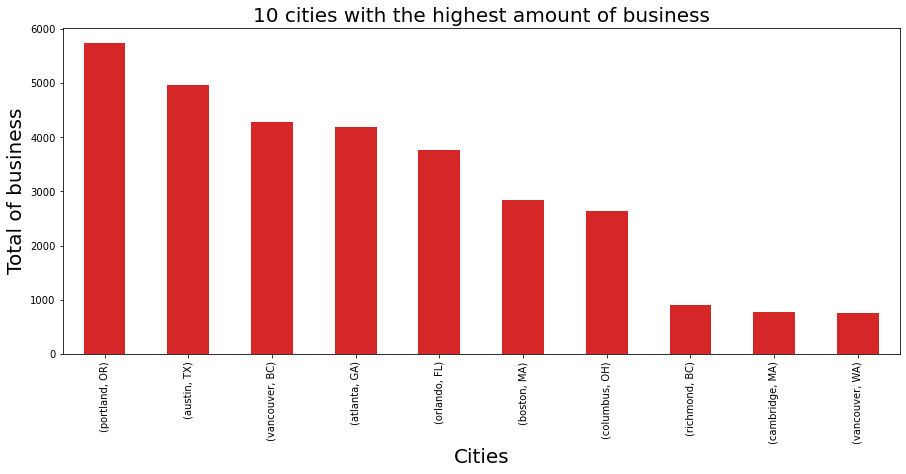

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax= plt.subplots(1,1,figsize=(15,6))
a=df_b.groupby(by=['city','state'],as_index=True).count().sort_values(by='stars',ascending=False)[0:10]
a.business_id.plot.bar(color ='tab:red')
plt.ylabel('Total of business',fontsize=20)
plt.xlabel('Cities',fontsize=20)
plt.title('10 cities with the highest amount of business',fontsize=20)

In [12]:
b=df_b.groupby(by=['city','state'],as_index=True).sum().sort_values(by='review_count',ascending=True)
b.review_count.describe().to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &   review\\_count \\\\\n\\midrule\ncount &     429.000000 \\\\\nmean  &   12576.027972 \\\\\nstd   &   69613.922288 \\\\\nmin   &       5.000000 \\\\\n25\\%   &      38.000000 \\\\\n50\\%   &     370.000000 \\\\\n75\\%   &    4644.000000 \\\\\nmax   &  781596.000000 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [13]:
df_b.groupby(by='state',as_index=False).review_count.sum().sort_values(by='review_count',ascending=False)[0:10]

,state,review_count
7,MA,1321763
11,OR,886301
12,TX,824359
4,GA,767356
3,FL,739760
1,BC,412818
10,OH,287914
2,CO,87300
14,WA,67453
5,KS,28


Text(0.5, 1.0, '10 cities with the highest amount of reviews')

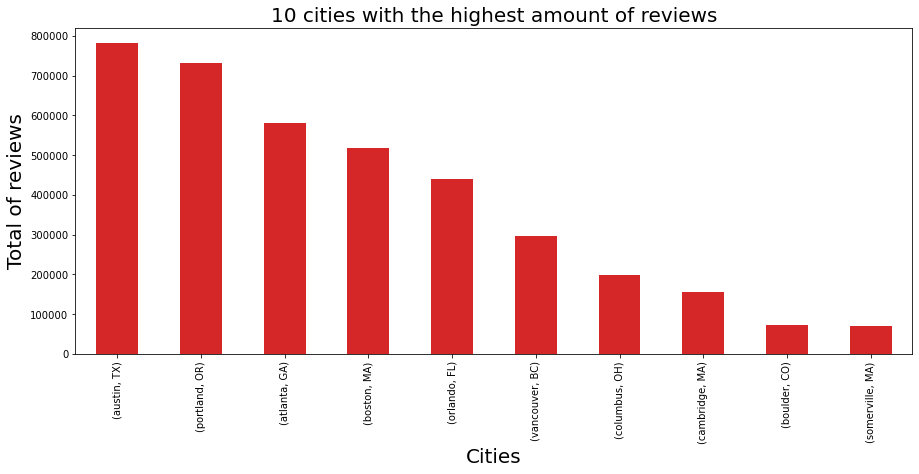

In [14]:
c=df_b.groupby(by=['city','state'],as_index=True).review_count.sum().sort_values(ascending=False)[0:10]
fig, ax= plt.subplots(1,1,figsize=(15,6))
c.plot.bar(color ='tab:red')
plt.ylabel('Total of reviews',fontsize=20)
plt.xlabel('Cities',fontsize=20)
plt.title('10 cities with the highest amount of reviews',fontsize=20)

In [15]:
df_b.groupby(by=['city','state'],as_index=True).sum().groupby(by='review_count').count().describe()


,latitude,longitude,stars
count,323.000000,323.000000,323.000000
mean,1.328173,1.328173,1.328173
std,1.070806,1.070806,1.070806
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000


In [16]:
n=df_b.groupby(by=['city','state'],as_index=True).sum().sort_values(by='review_count',ascending=False)
n[50:100]

,,latitude,longitude,stars,review_count
city,state,,,,
westerville,OH,7061.579640,-14595.081231,606.5,10638
beverly,MA,6809.346930,-11341.289974,565.0,10351
louisville,CO,4556.762757,-11986.782090,406.5,10324
coquitlam,BC,15911.926149,-39675.288430,1096.0,10161
clermont,FL,4957.775301,-14217.991777,573.5,10027
hillsboro,OR,3642.879973,-9829.903997,268.5,9669
dedham,MA,4097.649728,-6903.699662,327.5,9656
saugus,MA,5266.329174,-8806.255749,392.5,9553
hilliard,OH,6603.015477,-13718.647288,551.0,9387


In [17]:
n=df_b.groupby(by=['city','state'],as_index=True).sum().sort_values(by='review_count',ascending=False)[0:10]
n.loc['other']=[0,0,0,0]

In [18]:
part=n.review_count.sum()
other=tot-part
other

1550318

In [19]:
n['review_count'][10]=tot-part
n

<ipython-input-19-61264502aba7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['review_count'][10]=tot-part


,latitude,longitude,stars,review_count
"(austin, TX)",150241.481295,-484750.702293,18235.0,781596
"(portland, OR)",260975.327788,-703171.304521,21929.0,731143
"(atlanta, GA)",141299.294542,-352801.691255,14310.5,582198
"(boston, MA)",120526.531232,-202264.702590,9976.5,519285
"(orlando, FL)",107183.429141,-306183.048258,13253.5,439484
"(vancouver, BC)",210618.048406,-526324.203284,15010.5,296073
"(columbus, OH)",105310.955669,-218454.806940,9141.5,198158
"(cambridge, MA)",32839.074327,-55108.126820,2736.0,154713
"(boulder, CO)",26653.364890,-70105.195283,2387.0,71901
"(somerville, MA)",16489.896610,-27659.961968,1432.0,70247


In [20]:
n['review_count']=n['review_count']/tot*100
n

,latitude,longitude,stars,review_count
"(austin, TX)",150241.481295,-484750.702293,18235.0,14.487103
"(portland, OR)",260975.327788,-703171.304521,21929.0,13.551942
"(atlanta, GA)",141299.294542,-352801.691255,14310.5,10.791204
"(boston, MA)",120526.531232,-202264.702590,9976.5,9.625094
"(orlando, FL)",107183.429141,-306183.048258,13253.5,8.145960
"(vancouver, BC)",210618.048406,-526324.203284,15010.5,5.487797
"(columbus, OH)",105310.955669,-218454.806940,9141.5,3.672915
"(cambridge, MA)",32839.074327,-55108.126820,2736.0,2.867649
"(boulder, CO)",26653.364890,-70105.195283,2387.0,1.332705
"(somerville, MA)",16489.896610,-27659.961968,1432.0,1.302048


Text(0.5, 1.0, 'Percentage of reviews in every city')

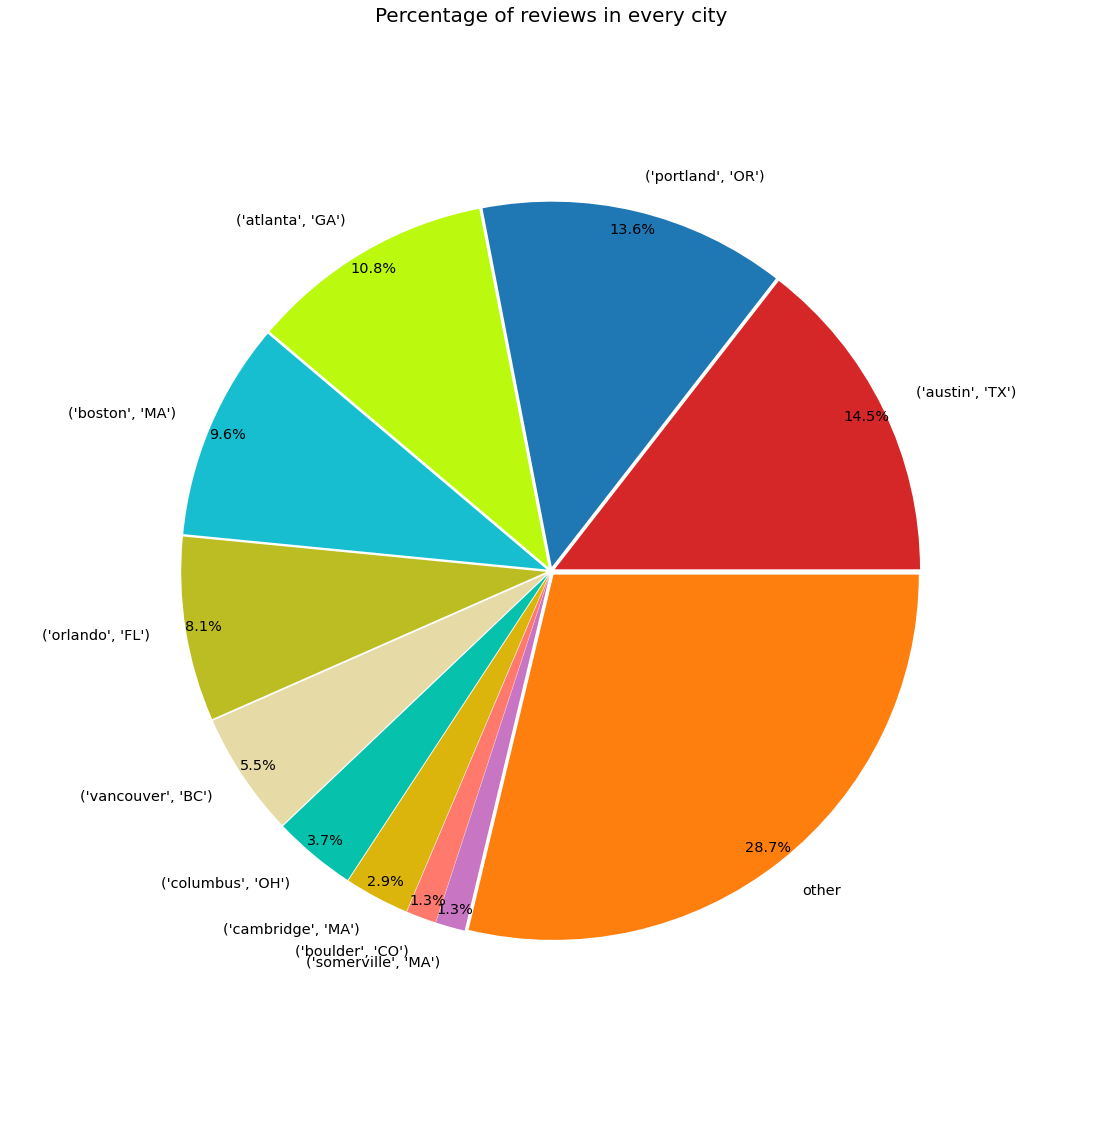

In [21]:
fig, ax= plt.subplots(1,1,figsize=(20,20))
m=n.review_count
labels = m.keys()
plt.pie(x=m, autopct="%.1f%%", radius=0.84,explode=[0.01]*11, colors=['tab:red','tab:blue','xkcd:yellowgreen','tab:cyan','tab:olive','xkcd:beige','xkcd:turquoise','xkcd:gold','xkcd:salmon','xkcd:orchid','tab:orange'],labels=labels, pctdistance=0.95,textprops={'fontsize': 14.5})
plt.title('Percentage of reviews in every city',fontsize=20)

Text(0.5, 1.0, 'States with the highest amount of business')

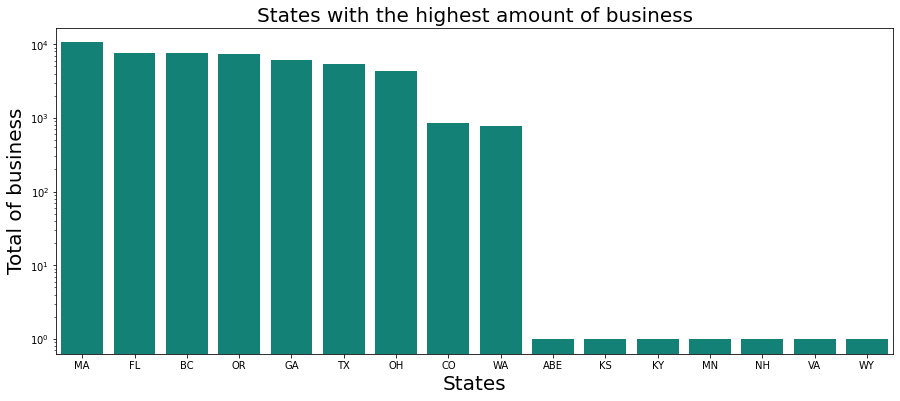

In [22]:
h=df_b.groupby(by='state',as_index=False).count().sort_values(by='stars',ascending=False)
fig, ax= plt.subplots(1,1,figsize=(15,6))
ax.set_yscale("log")
sns.barplot(data=h,x='state',y='stars',color='xkcd:teal')
plt.ylabel('Total of business',fontsize=20)
plt.xlabel('States',fontsize=20)
plt.title('States with the highest amount of business',fontsize=20)

Text(0.5, 1.0, 'States with the highest amount of reviews')

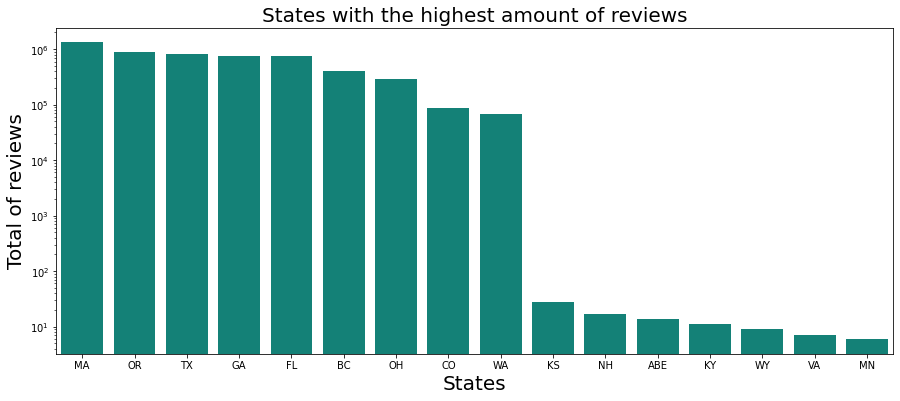

In [23]:
mm=df_b.groupby(by='state',as_index=False).review_count.sum().sort_values(by='review_count',ascending=False)
fig, ax= plt.subplots(1,1,figsize=(15,6))
ax.set_yscale("log")
sns.barplot(data=mm,x='state',y='review_count',color='xkcd:teal')
plt.ylabel('Total of reviews',fontsize=20)
plt.xlabel('States',fontsize=20)
plt.title('States with the highest amount of reviews',fontsize=20)

In [77]:
mm.describe()

,review_count,bin
count,1.600000e+01,16.000000
mean,3.371948e+05,3.312500
std,4.316259e+05,3.156343
min,6.000000e+00,1.000000
25%,1.325000e+01,1.000000
50%,7.737650e+04,1.000000
75%,7.466590e+05,6.000000
max,1.321763e+06,11.000000


In [24]:
mm

,state,review_count
7,MA,1321763
11,OR,886301
12,TX,824359
4,GA,767356
3,FL,739760
1,BC,412818
10,OH,287914
2,CO,87300
14,WA,67453
5,KS,28


In [107]:
pip install geonamescache

Note: you may need to restart the kernel to use updated packages.


In [31]:
from geonamescache import GeonamesCache
#from helpers import slug
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

In [27]:
gc = GeonamesCache()
iso3_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

In [45]:
for i in range(16):
    print(mm['state'].values[i] in iso3_codes)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [34]:
values = mm['review_count']
cm = plt.get_cmap('Greens')
num_colors = 11
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
mm['bin'] = np.digitize(values, bins)
mm.sort_values('bin', ascending=False).head(10)

,state,review_count,bin
7,MA,1321763,11
11,OR,886301,7
12,TX,824359,7
4,GA,767356,6
3,FL,739760,6
1,BC,412818,4
10,OH,287914,3
2,CO,87300,1
14,WA,67453,1
5,KS,28,1


OSError: cannot locate shp/countries/ne_10m_admin_0_countries_lakes.shp

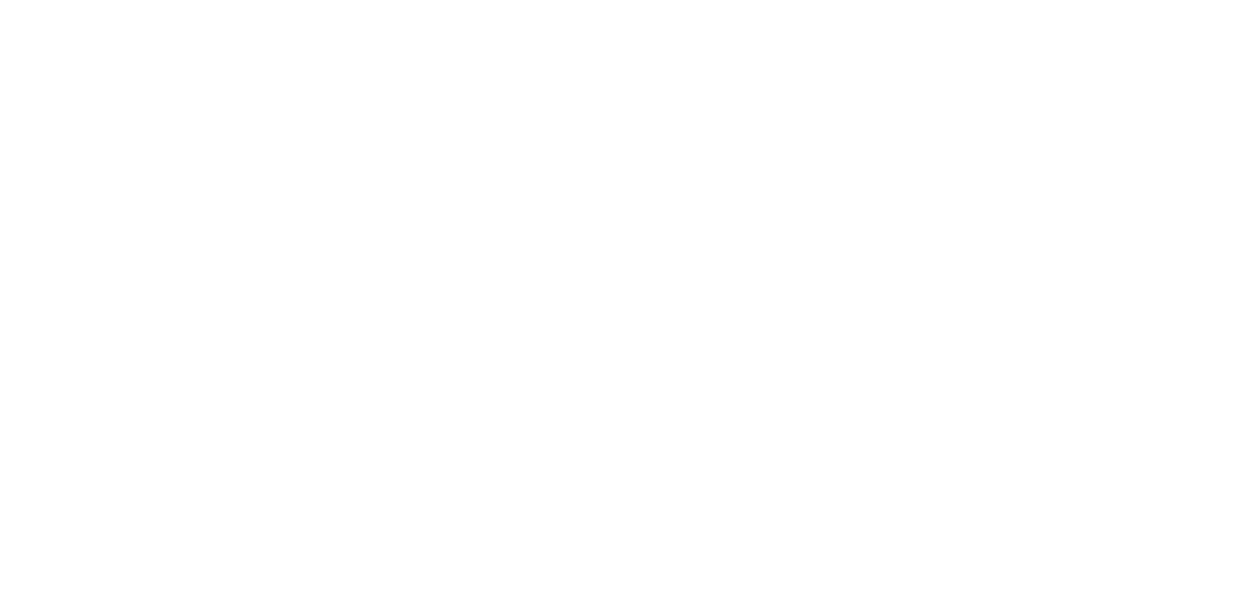

In [38]:
#mpl.style.use('map')
fig = plt.figure(figsize=(22, 12))

#ax = fig.add_subplot(111, axisbg='w', frame_on=False)
#fig.suptitle('Forest area as percentage of land area in {}'.format(year), fontsize=30, y=.95)

m = Basemap(projection='lcc', resolution='h', 
            lat_0=44.5, lon_0=-107,
            width=8.0E6, height=3.8E6)
m.drawmapboundary(color='w')

shapefile = 'shp/countries/ne_10m_admin_0_countries_lakes'
m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
for info, shape in zip(m.units_info, m.units):
    iso3 = info['ADM0_A3']
    if iso3 not in df.index:
        color = '#dddddd'
    else:
        color = scheme[df.ix[iso3]['bin']]

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)

# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

# Draw color legend.
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

# Set the map footer.
plt.annotate(description, xy=(-.8, -3.2), size=14, xycoords='axes fraction')

plt.savefig(imgfile, bbox_inches='tight', pad_inches=.2)

In [99]:
mm[0:17]

,state,review_count
7,MA,1321763
11,OR,886301
12,TX,824359
4,GA,767356
3,FL,739760
1,BC,412818
10,OH,287914
2,CO,87300
14,WA,67453
5,KS,28


In [100]:
mm=mm.drop([15,13,8,6,0,9,5],axis=0)
mm.loc[16]=['7 smallest ones',92]
mm

,state,review_count
7,MA,1321763
11,OR,886301
12,TX,824359
4,GA,767356
3,FL,739760
1,BC,412818
10,OH,287914
2,CO,87300
14,WA,67453
16,7 smallest ones,92


In [101]:
tot1=mm.review_count.sum()
mm['perc']=mm['review_count']/tot1*100

([<matplotlib.patches.Wedge at 0x206a49218e0>,
 [Text(0.6391469797603714, 0.6193473486366076, 'MA'),
  Text(-0.4146363190299917, 0.7875129985855847, 'OR'),
  Text(-0.8863946600429983, 0.0800281615886411, 'TX'),
  Text(-0.5961466500133789, -0.6608397473501622, 'GA'),
  Text(0.12738421461656693, -0.8808366828569986, 'FL'),
  Text(0.6475361690590398, -0.6105709702895664, 'BC'),
  Text(0.8366544652316629, -0.3034951495624278, 'OH'),
  Text(0.8825478531525611, -0.11493166185088186, 'CO'),
  Text(0.8893098081657612, -0.035043759789402155, 'WA'),
  Text(0.8899999987248092, -4.764283517830003e-05, '7 smallest ones')],
 [Text(0.5242441519382821, 0.5080040050614871, '24.499%'),
  Text(-0.34009495830549885, 0.6459376280533446, '16.428%'),
  Text(-0.7270428110465041, 0.06564107635922246, '15.280%'),
  Text(-0.4889742185502996, -0.5420370961411443, '14.223%'),
  Text(0.10448368165179084, -0.7224840207703471, '13.712%'),
  Text(0.5311251723742686, -0.5008054025970601, '7.652%'),
  Text(0.68624467372

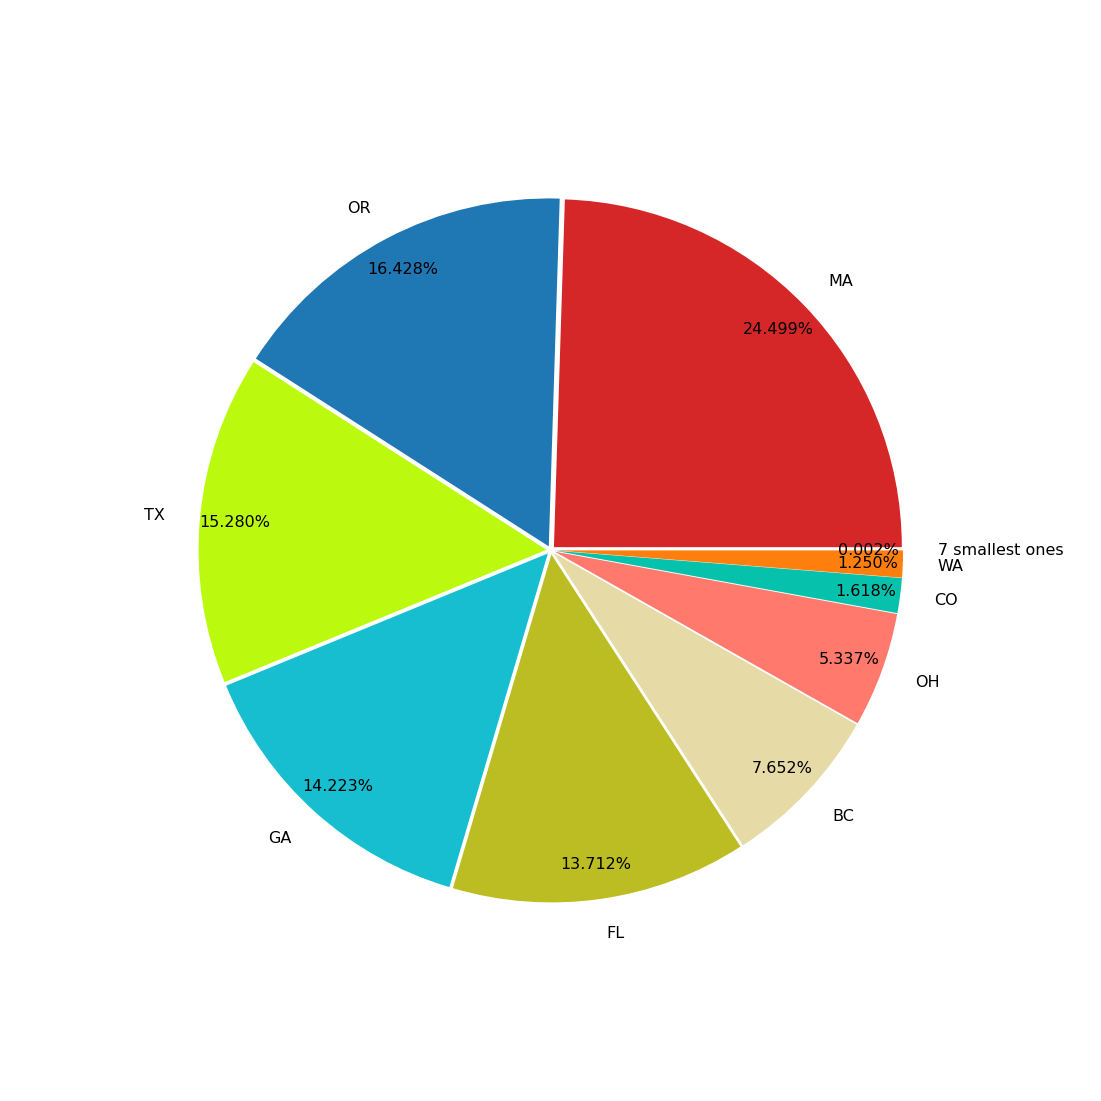

In [104]:
fig, ax= plt.subplots(1,1,figsize=(20,20))
labels = mm.state
plt.pie(x=mm.review_count, autopct="%.3f%%", explode=[0.01]*10, labels=labels, radius=0.8 , colors=['tab:red','tab:blue','xkcd:yellowgreen','tab:cyan','tab:olive','xkcd:beige','xkcd:salmon','xkcd:turquoise','tab:orange','xkcd:orchid'], pctdistance=0.9,textprops={'fontsize': 16})

In [28]:
d=df_b.groupby(by=['city','state'],as_index=False).count().sort_values(by='stars',ascending=False)
five=df_b[df_b['stars']==5].groupby(by=['city','state'],as_index=False).count()
five=five.merge(d,on=['city','state'],how='right')
five=five.fillna(0)
five['density']=(five['business_id_x']/five['business_id_y'])*100
five

,city,state,business_id_x,latitude_x,longitude_x,stars_x,review_count_x,business_id_y,latitude_y,longitude_y,stars_y,review_count_y,density
0,portland,OR,352.0,352.0,352.0,352.0,352.0,5733,5733,5733,5733,5733,6.139892
1,austin,TX,255.0,255.0,255.0,255.0,255.0,4959,4959,4959,4959,4959,5.142166
2,vancouver,BC,66.0,66.0,66.0,66.0,66.0,4275,4275,4275,4275,4275,1.543860
3,atlanta,GA,72.0,72.0,72.0,72.0,72.0,4181,4181,4181,4181,4181,1.722076
4,orlando,FL,85.0,85.0,85.0,85.0,85.0,3762,3762,3762,3762,3762,2.259436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,marlbehead,MA,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0.000000
425,marysville,OH,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0.000000
426,miami beach,FL,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0.000000
427,midway,FL,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0.000000


Text(0.5, 1.0, 'Cities percentage of businesses graded 5 stars')

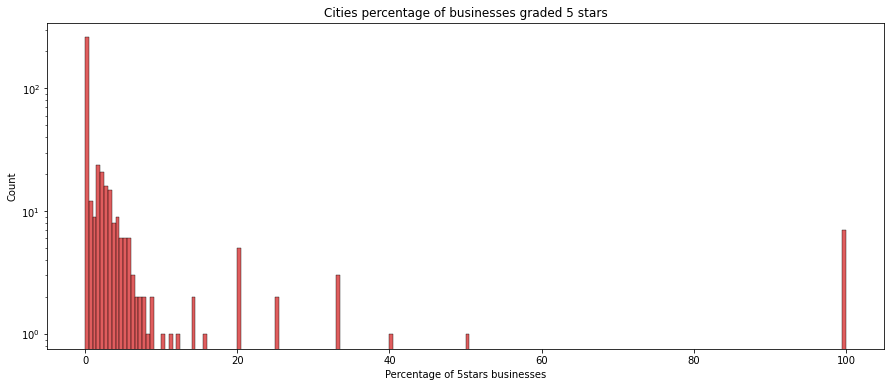

In [29]:
fig, ax= plt.subplots(1,1,figsize=(15,6))
sns.histplot(data=five,x='density',bins=200,color='tab:red',log_scale=(False,True), ax=ax)
plt.xlabel('Percentage of 5stars businesses')
plt.title('Cities percentage of businesses graded 5 stars')

Text(0.5, 1.0, '15th cities with the highest percentage of 5stars reviews')

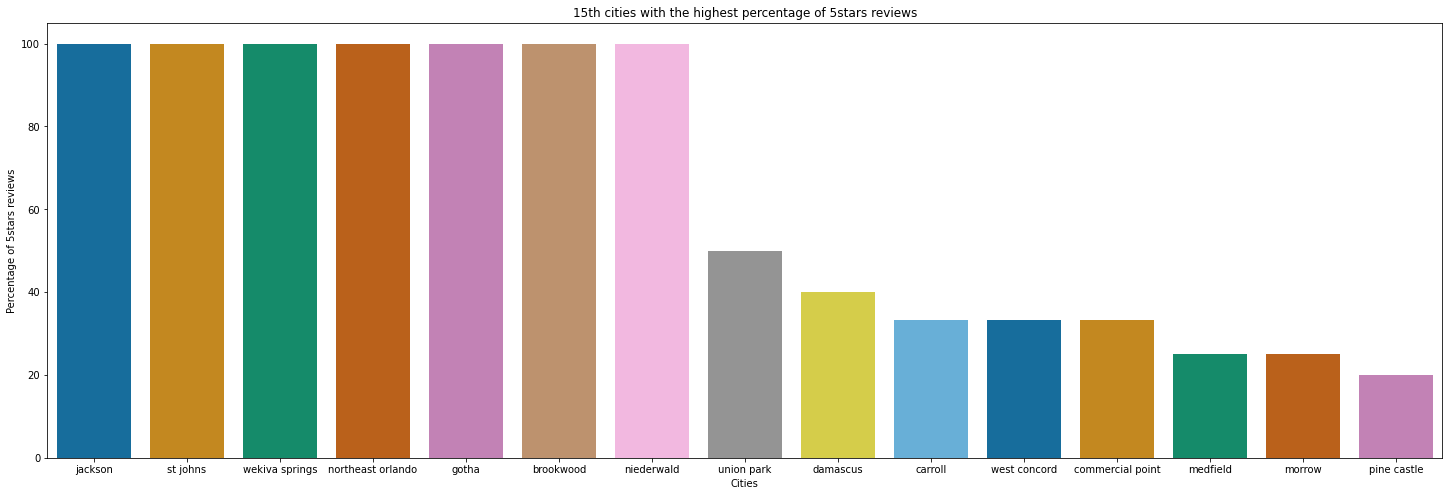

In [30]:
fig, ax= plt.subplots(1,1,figsize=(25,8))
sns.barplot(data=five.sort_values(by='density',ascending=False)[0:15],x='city',y='density',palette='colorblind')
plt.ylabel('Percentage of 5stars reviews')
plt.xlabel('Cities')
plt.title('15th cities with the highest percentage of 5stars reviews')

In [31]:
five[five['density']>40]

,city,state,business_id_x,latitude_x,longitude_x,stars_x,review_count_x,business_id_y,latitude_y,longitude_y,stars_y,review_count_y,density
279,union park,FL,1.0,1.0,1.0,1.0,1.0,2,2,2,2,2,50.0
317,st johns,OR,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,100.0
323,wekiva springs,FL,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,100.0
347,gotha,FL,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,100.0
372,brookwood,GA,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,100.0
386,niederwald,TX,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,100.0
390,northeast orlando,FL,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,100.0
410,jackson,TX,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,100.0


In [32]:
five.density.mean()

3.6530772878939213

Text(0.5, 1.0, '15th cities with the highest percentage of 1star reviews')

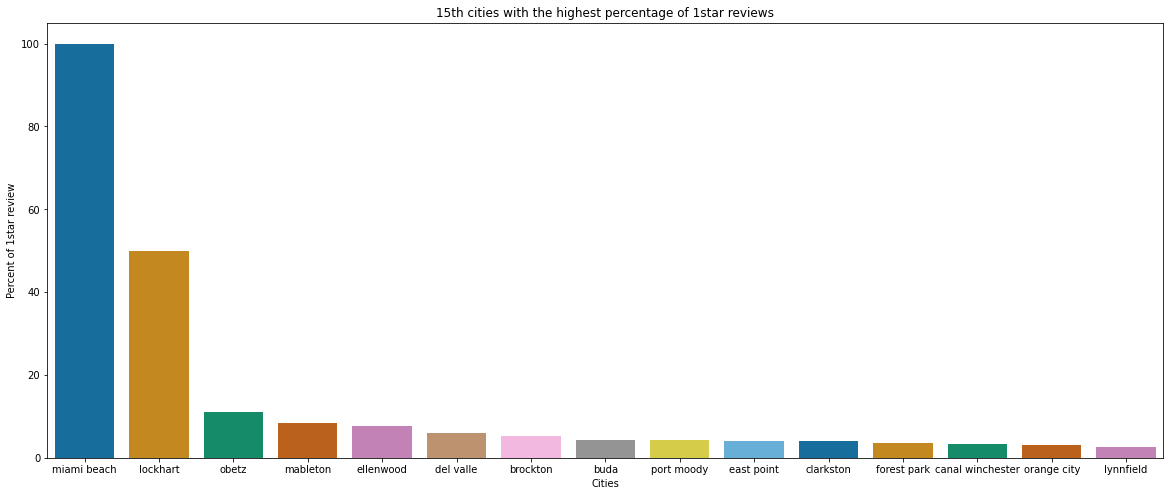

In [33]:
one=df_b[df_b['stars']==1].groupby(by=['city','state'],as_index=False).count()
one=one.merge(d,on=['city','state'],how='right')
one=one.fillna(0)
one['density']=(one['business_id_x']/one['business_id_y'])*100
fig, ax= plt.subplots(1,1,figsize=(20,8))
sns.barplot(data=one.sort_values(by='density',ascending=False)[0:15],x='city',y='density',palette='colorblind')
plt.ylabel('Percent of 1star review')
plt.xlabel('Cities')
plt.title('15th cities with the highest percentage of 1star reviews')

In [34]:
df_b[df_b['city']=='miami beach']

,business_id,city,state,latitude,longitude,stars,review_count
64352,0IvCudVb4N0fJeFk4nAw8w,miami beach,FL,28.552629,-81.473134,1.0,16


In [35]:
one[one['density']>10]

,city,state,business_id_x,latitude_x,longitude_x,stars_x,review_count_x,business_id_y,latitude_y,longitude_y,stars_y,review_count_y,density
208,obetz,OH,1.0,1.0,1.0,1.0,1.0,9,9,9,9,9,11.111111
261,lockhart,FL,1.0,1.0,1.0,1.0,1.0,2,2,2,2,2,50.000000
426,miami beach,FL,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,100.000000


In [36]:
one=df_b[df_b['stars']<=1.5][df_b['stars']>=1.0 ].groupby(by=['city','state'],as_index=False).count()
one=one.merge(d,on=['city','state'],how='right')
one=one.fillna(0)
one['density']=(one['business_id_x']/one['business_id_y'])*100

<ipython-input-36-bc0e04a0dd72>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  one=df_b[df_b['stars']<=1.5][df_b['stars']>=1.0 ].groupby(by=['city','state'],as_index=False).count()


In [37]:
two=df_b[df_b['stars']<=2.5 ][df_b['stars']>=2 ].groupby(by=['city','state'],as_index=False).count()
two=two.merge(d,on=['city','state'],how='right')
two=two.fillna(0)
two['density']=(two['business_id_x']/two['business_id_y'])*100

<ipython-input-37-2ded39a351bf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  two=df_b[df_b['stars']<=2.5 ][df_b['stars']>=2 ].groupby(by=['city','state'],as_index=False).count()


In [38]:
three=df_b[df_b['stars']<=3.5 ][df_b['stars']>=3 ].groupby(by=['city','state'],as_index=False).count()
three=three.merge(d,on=['city','state'],how='right')
three=three.fillna(0)
three['density']=(three['business_id_x']/three['business_id_y'])*100

<ipython-input-38-3fd8a52e95e2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  three=df_b[df_b['stars']<=3.5 ][df_b['stars']>=3 ].groupby(by=['city','state'],as_index=False).count()


In [39]:
four=df_b[df_b['stars']<=4.5 ][df_b['stars']>=4 ].groupby(by=['city','state'],as_index=False).count()
four=four.merge(d,on=['city','state'],how='right')
four=four.fillna(0)
four['density']=(four['business_id_x']/four['business_id_y'])*100

<ipython-input-39-518e4f6c91ac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  four=df_b[df_b['stars']<=4.5 ][df_b['stars']>=4 ].groupby(by=['city','state'],as_index=False).count()


In [77]:
four[four['density']==100]

,city,state,business_id_x,latitude_x,longitude_x,stars_x,review_count_x,business_id_y,latitude_y,longitude_y,stars_y,review_count_y,density
227,championsgate,FL,5.0,5.0,5.0,5.0,5.0,5,5,5,5,5,100.0
239,driftwood,TX,4.0,4.0,4.0,4.0,4.0,4,4,4,4,4,100.0
240,eatonville,FL,4.0,4.0,4.0,4.0,4.0,4,4,4,4,4,100.0
242,edgewood,FL,4.0,4.0,4.0,4.0,4.0,4,4,4,4,4,100.0
265,osteen,FL,2.0,2.0,2.0,2.0,2.0,2,2,2,2,2,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,loughman,FL,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,100.0
423,marble cliff,OH,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,100.0
425,marysville,OH,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,100.0
427,midway,FL,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,100.0


Text(0.5, 1.0, 'Cities percentage of reviews graded 1 or 1.5 stars')

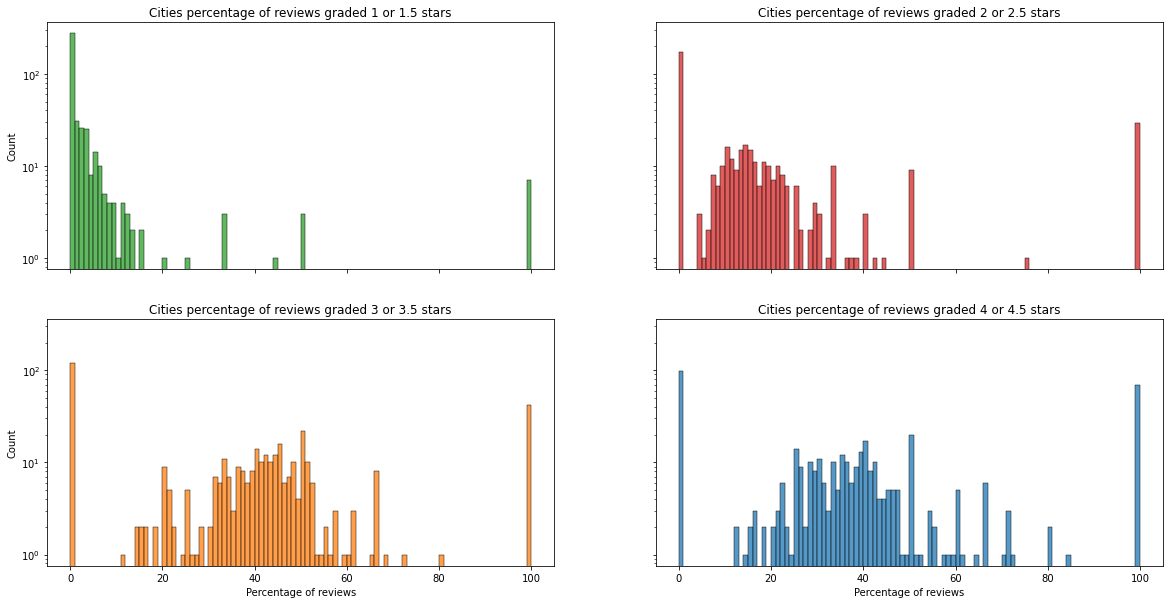

In [40]:
fig, ax= plt.subplots(2,2,figsize=(20,10),sharex=True,sharey=True)
sns.histplot(data=four,x='density',bins=100,log_scale=(False,True),color='tab:blue',ax=ax[1,1])
ax[1,1].set_xlabel('Percentage of reviews')
ax[1,1].set_title('Cities percentage of reviews graded 4 or 4.5 stars')
sns.histplot(data=three,x='density',bins=100,log_scale=(False,True),color='tab:orange',ax=ax[1,0])
ax[1,0].set_xlabel('Percentage of reviews')
ax[1,0].set_title('Cities percentage of reviews graded 3 or 3.5 stars')
sns.histplot(data=two,x='density',bins=100,log_scale=(False,True),color='tab:red',ax=ax[0,1])
ax[0,1].set_xlabel('Percentage of reviews')
ax[0,1].set_title('Cities percentage of reviews graded 2 or 2.5 stars')
sns.histplot(data=one,x='density',bins=100,log_scale=(False,True),color='tab:green',ax=ax[0,0])
ax[0,0].set_xlabel('Percentage of reviews')
ax[0,0].set_title('Cities percentage of reviews graded 1 or 1.5 stars')

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [99]:
lat = df_b['latitude'].values
lon = df_b['longitude'].values
pop = df_b['review_count'].values

In [87]:
type(pop)

numpy.ndarray

Text(0.5, 1.0, 'Cities with the highest amount of reviews')

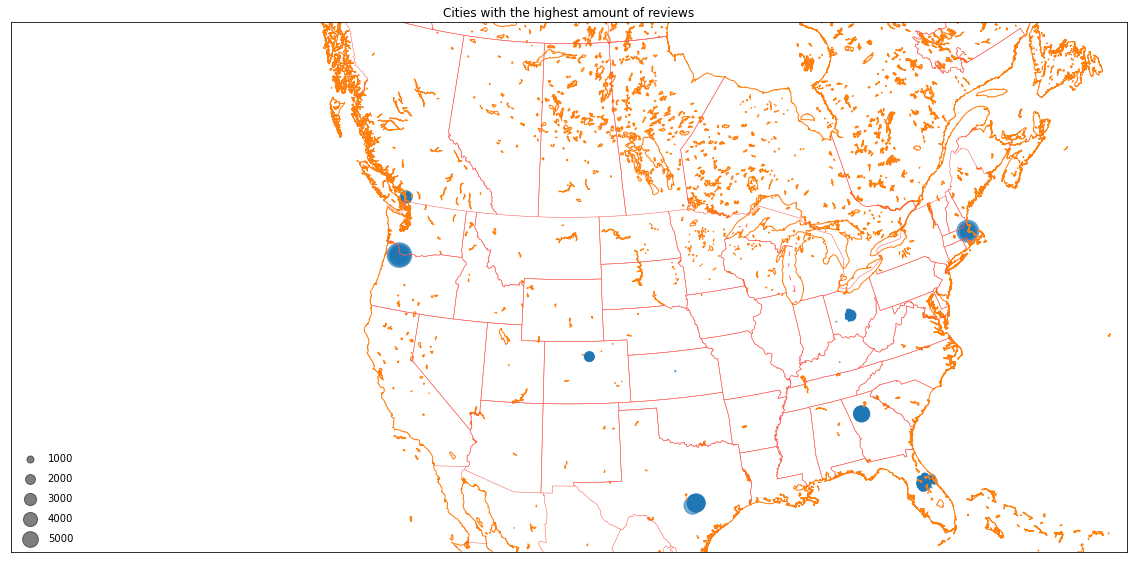

In [80]:
# 1. Draw the map background
fig = plt.figure(figsize=(20, 10))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=44.5, lon_0=-107,
            width=8.0E6, height=3.8E6)
#m.shadedrelief()
m.drawcoastlines(color='tab:orange')
m.drawcountries(color='xkcd:coral')
m.drawstates(color='xkcd:coral')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          s=pop/15,cmap='Reds', alpha=0.6)

# 3. create colorbar and legend
#plt.colorbar(label='Number of reviews')
#plt.clim(0,10000 )

# make legend with dummy points
for i in [50, 100, 150, 200, 250]:
    plt.scatter([], [], c='k', alpha=0.5, s=i,
                label=str(i*2*10))
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left')
plt.title('Cities with the highest amount of reviews')

<function matplotlib.pyplot.show(close=None, block=None)>

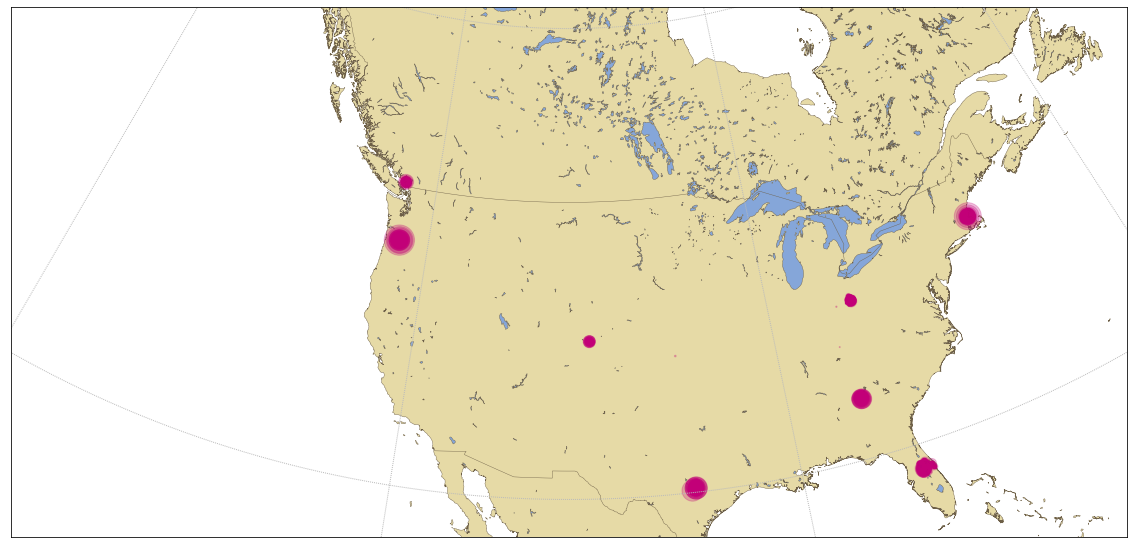

In [112]:
import matplotlib.cm as cm
fig = plt.figure(figsize=(20, 10))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=44.5, lon_0=-107,
            width=8.0E6, height=3.8E6)

# draw coastlines, country boundaries, fill continents.
m.fillcontinents(color='xkcd:beige',lake_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawcountries(color='#6D5F47', linewidth=.4)

# draw lat/lng grid lines every 30 degrees.
m.drawmeridians(np.arange(-180, 180, 30), color='#bbbbbb')
m.drawparallels(np.arange(-90, 90, 30), color='#bbbbbb')

#scatter scaled circles at the city locations
m.scatter(
    lon,
    lat,
    latlon=True,
    s=pop/10, #size
    c='xkcd:magenta', #color
    marker='o', #symbol
    alpha=0.25, #transparency
    zorder = 2, #plotting order
    )

#m.scatter( lon , lat, s=pop/15, alpha=0.5,latlon=True,cmap='viridis')
plt.show

In [113]:
df_Bos=df_b[df_b['city']=='Boston']
df_Bos.head(2)

,business_id,city,state,latitude,longitude,stars,review_count


<function matplotlib.pyplot.show(close=None, block=None)>

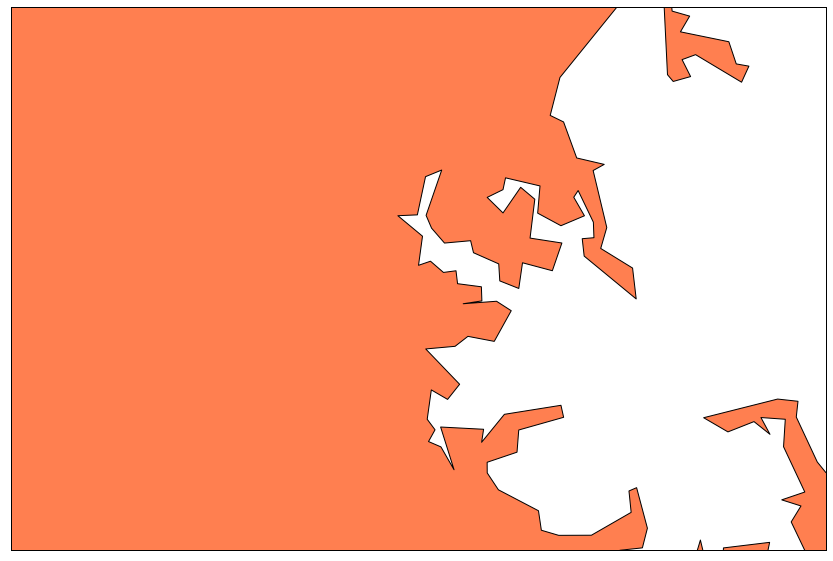

In [114]:
fig = plt.figure(figsize=(20, 10))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=42.35, lon_0=-71.05,
            width=3.0E4, height=2.0E4)

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral')
m.drawmapboundary()
x,y = m(df_Bos.longitude.tolist(), df_Bos.latitude.tolist())
m.plot(x, y, 'bo', markersize=10)
plt.show

In [115]:
latB = df_Bos['latitude'].values
lonB = df_Bos['longitude'].values
populationB = df_Bos['review_count'].values

Text(0.5, 1.0, 'Boston reviews')

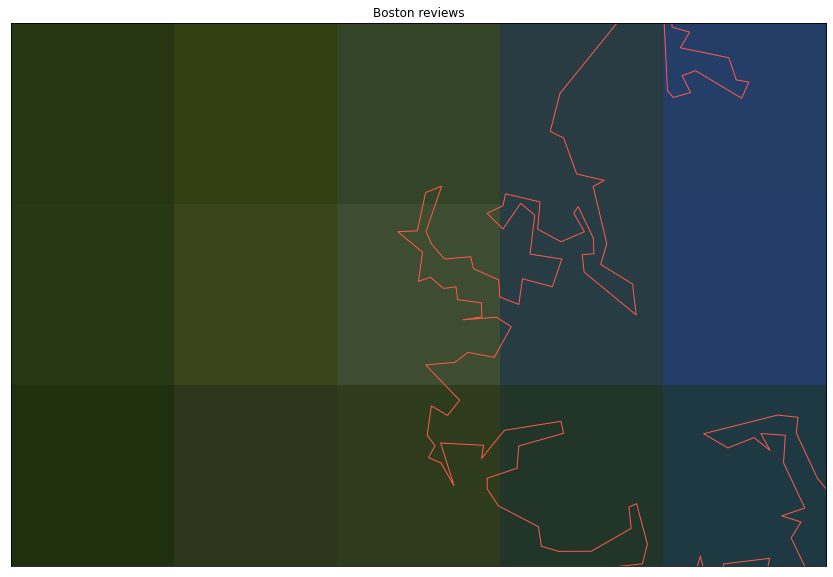

In [116]:
# 1. Draw the map background
fig = plt.figure(figsize=(20, 10))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=42.35, lon_0=-71.05,
            width=3.0E4, height=2.0E4)
m.bluemarble()
m.drawcoastlines(color='xkcd:coral')
m.drawcountries(color='xkcd:coral')
m.drawstates(color='xkcd:coral')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lonB, latB, latlon=True,
          c=populationB,cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
#plt.colorbar(label='Number of reviews')
#plt.clim(3, 5)

# make legend with dummy points
for i in [10, 30, 50, 70, 90]:
    plt.scatter([], [], c='g', alpha=0.5, s=i,
                label=str(i*2*10))
#plt.legend(scatterpoints=1, frameon=False,
#           labelspacing=1, loc='lower left')
plt.title('Boston reviews')